In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

metrics = pd.read_excel('metrics.xlsx', sheet_name='Sheet3', index_col=0, header=0)

# Plotting functions

In [8]:
_nbins = 20
_color = 'springgreen'
_edgecolor = 'black'
_linewidth = 1.2

def plot_distributions(targets):
    fig, axs = plt.subplots(len(targets), 1, figsize=(10,20))
    fig.tight_layout(pad=3.0)
    for idx, plot_target in enumerate(targets):
        try:
            vars()[plot_target] = metrics[plot_target][metrics[plot_target] != 'ERR']
        except:
            vars()[plot_target] = metrics[plot_target]
        #print(plot_target + ' has {:d} valid numbers'.format(len(vars()[plot_target])))
        axs[idx].hist(list(vars()[plot_target]), bins = _nbins, color=_color, edgecolor = _edgecolor, linewidth = _linewidth)
        axs[idx].set_title(plot_target)
    plt.show()
    
def plot_routable_distributions(targets):
    fig, axs = plt.subplots(len(targets), 1, figsize=(10,20))
    fig.tight_layout(pad=3.0)
    for idx, plot_target in enumerate(targets):
        vars()[plot_target] = metrics[plot_target][metrics['detailedroute__errors__count'] != 'ERR']
        axs[idx].hist(list(vars()[plot_target]), bins = _nbins, color=_color, edgecolor = _edgecolor, linewidth = _linewidth)
        axs[idx].set_title(plot_target)
    plt.show()  
    
    
def plot_differences(targets):
    fig, axs = plt.subplots(len(targets), 1, figsize=(10,3*len(targets)))
    fig.tight_layout(pad=3.0)
    for idx, plot_target in enumerate(targets):
        try:
            vars()['f' + plot_target] = metrics[plot_target][(metrics['detailedroute__errors__count'] != 0) & (metrics[plot_target] != 'ERR')]
        except:
            vars()['f' + plot_target] = metrics[plot_target][metrics['detailedroute__errors__count'] != 0]
        vars()['s' + plot_target] = metrics[plot_target][metrics['detailedroute__errors__count'] == 0]
        vars()['ps' + plot_target] = metrics[plot_target][(metrics['detailedroute__errors__count'] != 0) & (metrics['detailedroute__errors__count'] != 'ERR')]
        
        _, bins, _ = axs[idx].hist(list(vars()['f' + plot_target]), _nbins, stacked=True, \
                color='springgreen', edgecolor = 'black', linewidth = 1.2)
        axs[idx].hist(list(vars()['s' + plot_target]), bins, stacked=True, \
                color='deepskyblue', edgecolor = 'black', linewidth = 1.2)
        axs[idx].hist(list(vars()['ps' + plot_target]), bins, stacked=True, \
                color='red', edgecolor = 'black', linewidth = 1.2)
        axs[idx].legend(['failed', 'clean_TR', 'pass_TR'])
        axs[idx].set_title(plot_target)
        
    plt.show()

# Specify plotting attributes

In [ ]:
plotting_figures = [
    'run__input__target_CP',
    'floorplan__timing__tns_total',
    'floorplan__timing__wns__worst',
    'placeopt__timing__tns__total',
    'placeopt__timing__wns__worst',
    'cts__timing__tns__total',
    'cts__timing__wns__worst',
    'floorplan__inst__area__util',
]

# Plot all data points, including failed designs

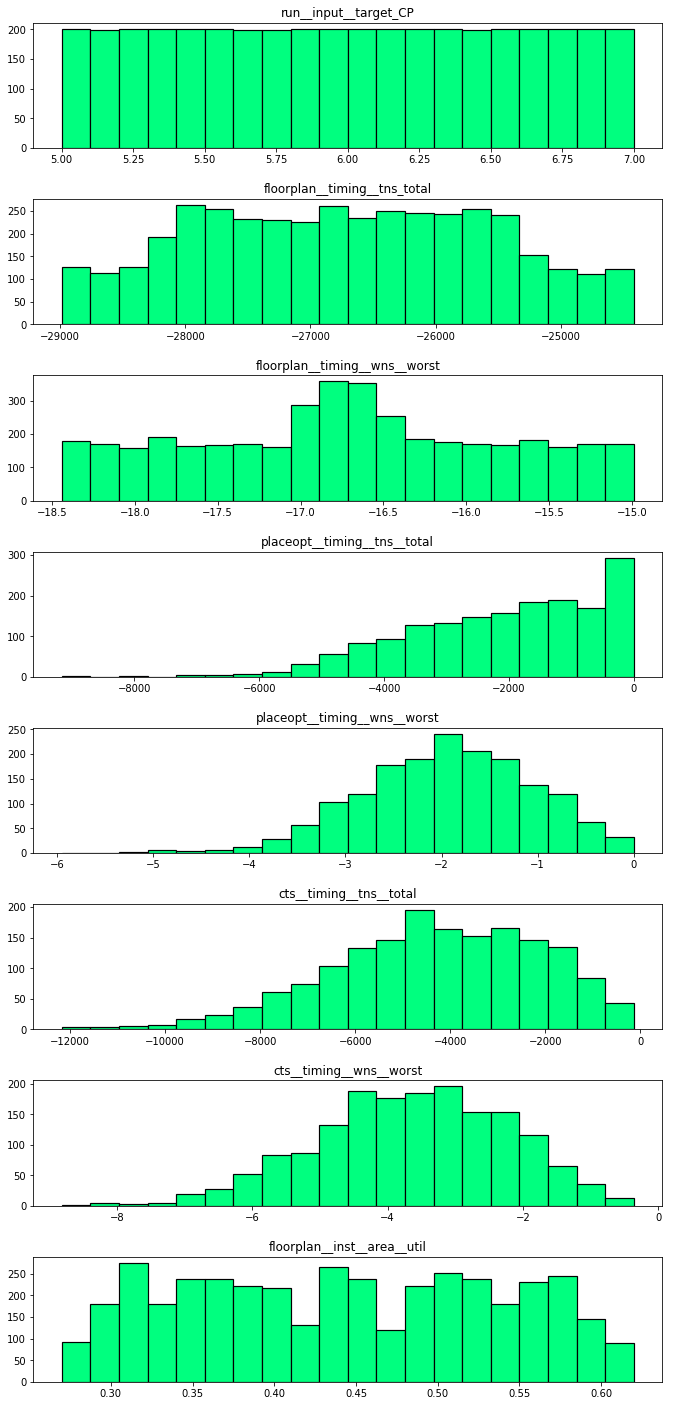

In [112]:
plot_distributions(plotting_figures)

# Plot routable designs only - not 'ERR' in detailedroute__errors__count attr

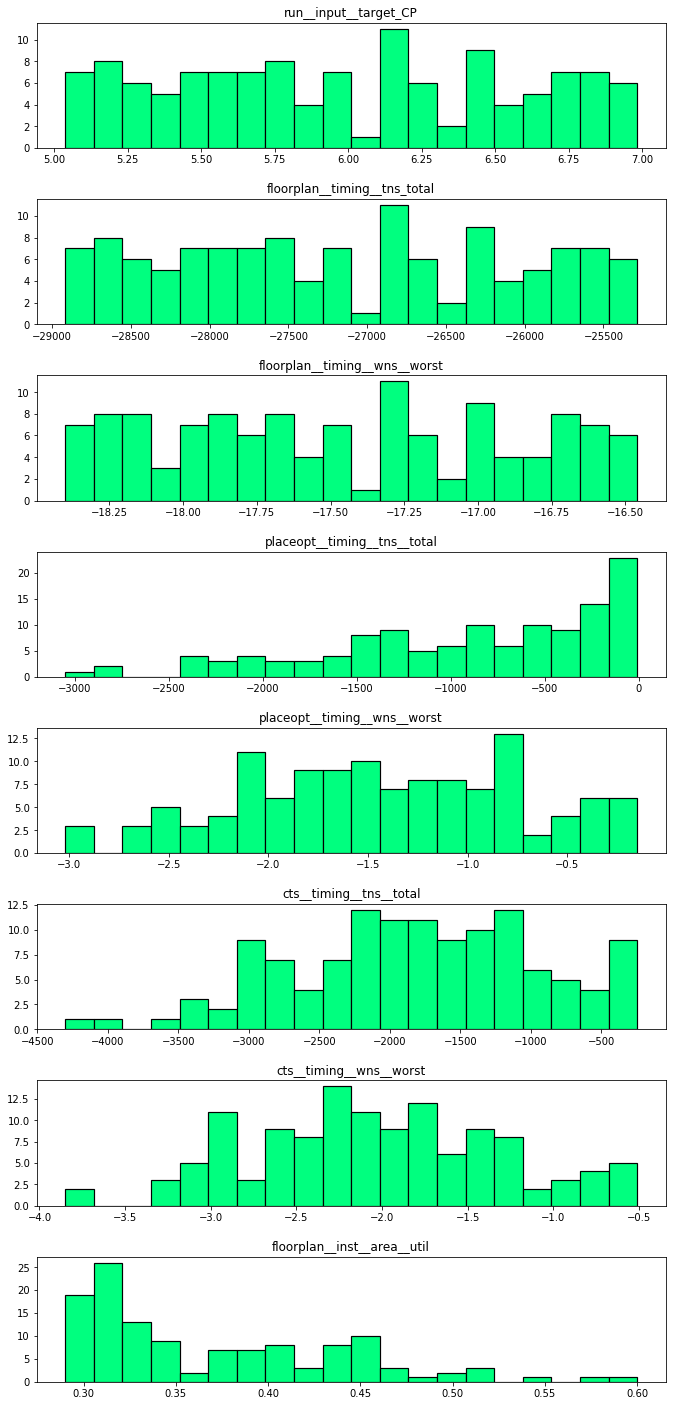

In [140]:
plot_routable_distributions(plotting_figures)

# Compare failed and successful data points

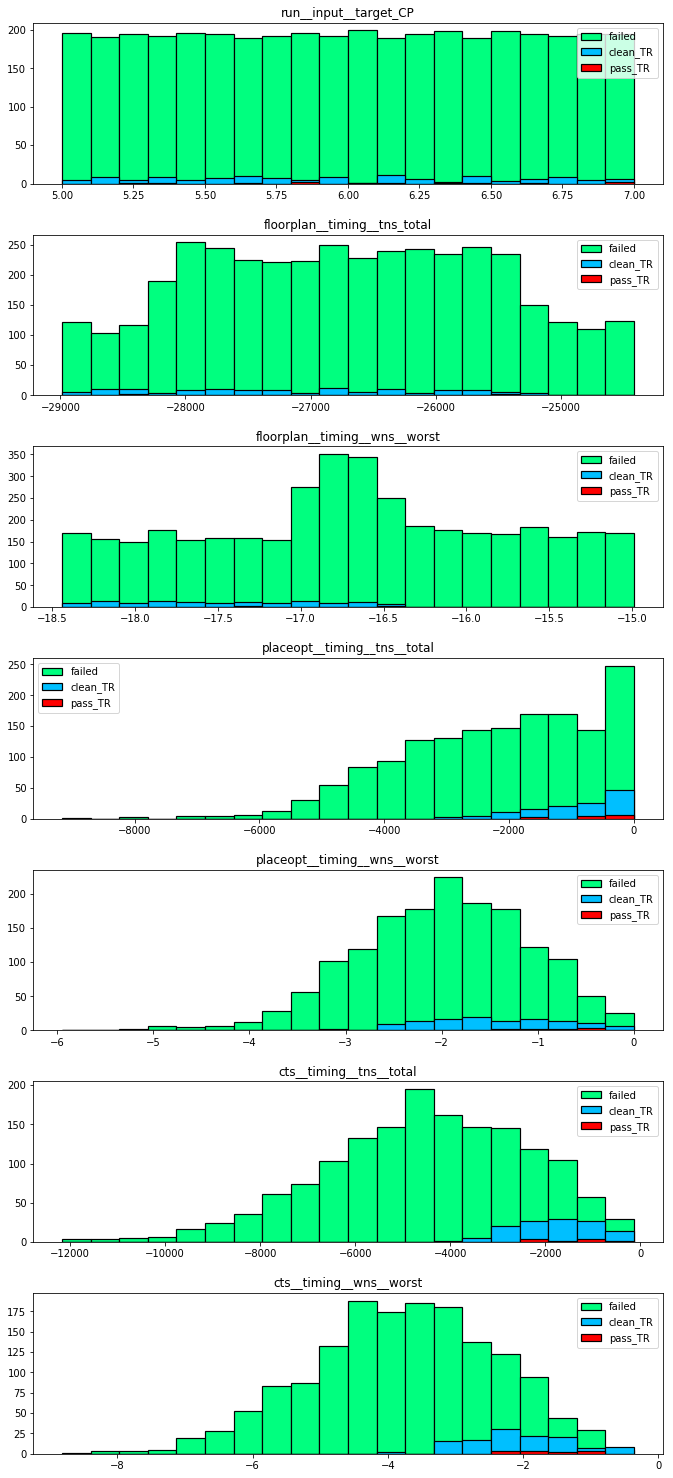

In [9]:
diff_plotting_figures = [
    'run__input__target_CP',
    'floorplan__timing__tns_total',
    'floorplan__timing__wns__worst',
    'placeopt__timing__tns__total',
    'placeopt__timing__wns__worst',
    'cts__timing__tns__total',
    'cts__timing__wns__worst',
]

plot_differences(diff_plotting_figures)

# 2D histogram plots

## All designs (including failed)

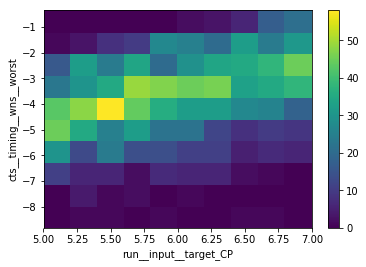

In [209]:
# plot run__input__target_CP vs. cts__timing__wns__worst
run__input__target_CP = metrics['run__input__target_CP'][metrics['cts__timing__wns__worst'] != 'ERR']
cts__timing__wns__worst = metrics['cts__timing__wns__worst'][metrics['cts__timing__wns__worst'] != 'ERR']
hist = plt.hist2d(run__input__target_CP, cts__timing__wns__worst)
plt.xlabel('run__input__target_CP')
plt.ylabel('cts__timing__wns__worst')
plt.colorbar()
plt.show()

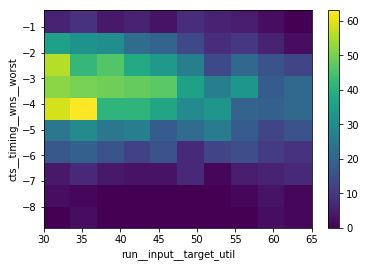

In [101]:
#plot run__input__target_util vs. cts__timing__wns__worst
run__input__target_util = metrics['run__input__target_util'][metrics['cts__timing__wns__worst'] != 'ERR']
cts__timing__wns__worst = metrics['cts__timing__wns__worst'][metrics['cts__timing__wns__worst'] != 'ERR']
hist = plt.hist2d(run__input__target_util, cts__timing__wns__worst)
plt.xlabel('run__input__target_util')
plt.ylabel('cts__timing__wns__worst')
plt.colorbar()
plt.show()

## Routed designs -- 0 detailedroute__errors__count

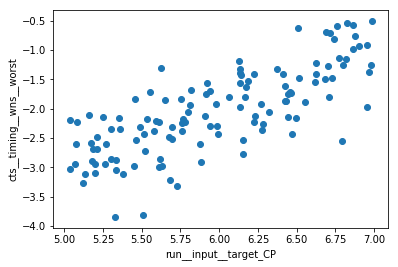

In [104]:
# scatter plot run__input__target_CP vs. cts__timing__wns__worst
run__input__target_CP = metrics['run__input__target_CP'][metrics['detailedroute__errors__count'] == 0]
cts__timing__wns__worst = metrics['cts__timing__wns__worst'][metrics['detailedroute__errors__count'] == 0]
plt.scatter(run__input__target_CP, cts__timing__wns__worst)
plt.xlabel('run__input__target_CP')
plt.ylabel('cts__timing__wns__worst')
plt.show()

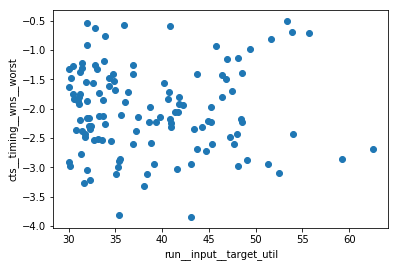

In [105]:
# scatter plot for run__input__target_util vs. cts__timing__wns__worst
run__input__target_util = metrics['run__input__target_util'][metrics['detailedroute__errors__count'] == 0]
cts__timing__wns__worst = metrics['cts__timing__wns__worst'][metrics['detailedroute__errors__count'] == 0]
plt.scatter(run__input__target_util, cts__timing__wns__worst)
plt.xlabel('run__input__target_util')
plt.ylabel('cts__timing__wns__worst')
plt.show()